# Task A: Investigating Natural Increase in Australia's population

# A1. Investigating the Births, Deaths and TFR Data

## A1.1:   Plotting number of births recorded in each state for different Australian states over different years

In [139]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

births = pd.read_csv('Births.csv', sep=',')
deaths = pd.read_csv('Deaths.csv', sep=',')
TFR = pd.read_csv('TFR.csv', sep=',')
NOM = pd.read_csv('NOM.csv', sep=',')
NIM = pd.read_csv('NIM.csv', sep=',')

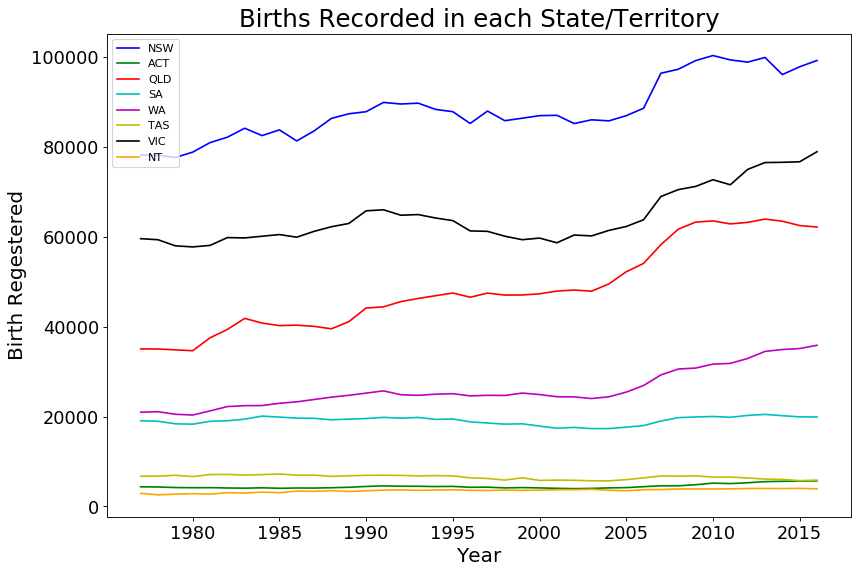

In [168]:
plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')


nsw = plt.plot(births.Year, births.NSW, color='b')
act = plt.plot(births.Year, births.ACT, color='g')
qld = plt.plot(births.Year, births.QLD, color='r')
sa = plt.plot(births.Year, births.SA, color='c')
wa = plt.plot(births.Year, births.WA, color='m')
tas = plt.plot(births.Year, births.TAS, color='y')
vic = plt.plot(births.Year, births.VIC, color='k')
nt = plt.plot(births.Year, births.NT, color='orange')




plt.xlabel('Year', fontsize=18)
plt.ylabel('Birth Regestered', fontsize=18)
plt.title('Births Recorded in each State/Territory', fontsize=22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.legend((nsw[0], act[0], qld[0], sa[0], wa[0], tas[0], vic[0], nt[0]), (
    'NSW', 'ACT', 'QLD', 'SA', 'WA', 'TAS','VIC', 'NT'))
plt.show()

## A1.1.b:   Bar chart to show number of births in each Australian State in 2016

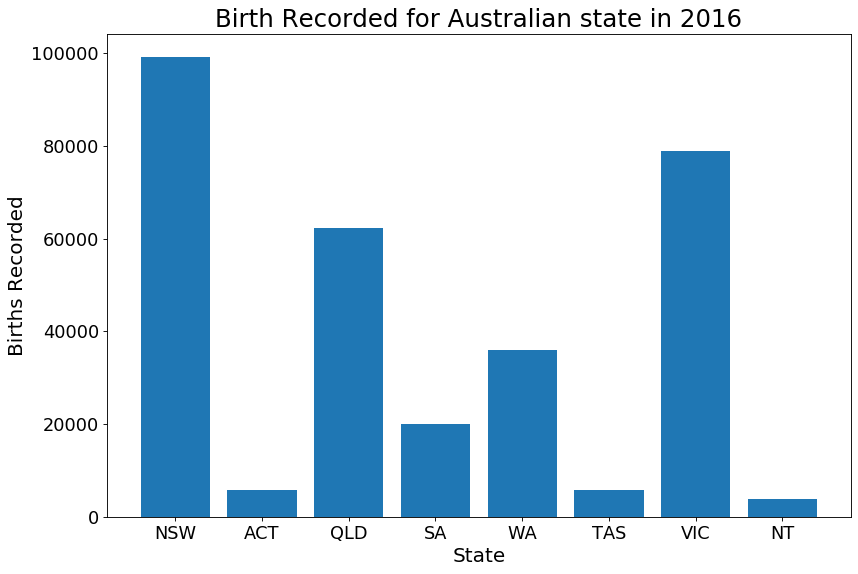

In [169]:
births2016 = births[births['Year'] == 2016]
del births2016['Year']
birth = births2016.transpose()
birth.rename(columns = {39 :'Population'},inplace = True)

plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')

def plot_bar_x():
    index = np.arange(len(birth['Population']))
    plt.bar(index, birth['Population'])
    plt.xlabel('State', fontsize = 18)
    plt.ylabel('Births Recorded', fontsize = 18)
    plt.title('Birth Recorded for Australian state in 2016', fontsize = 22)
    plt.xticks(index, birth.index, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.show()
plot_bar_x()

## A1.2:   Investigating the trend in total number of births over different years


## A1.2.a:   Linear regression- Total number of births in Australia over time


In [142]:
births_ = births
births_['Total'] = births_['NSW'] + births_['ACT'] + births_['QLD'] + births_['SA'] + births_['WA'] + births_['TAS'] + births_['VIC'] + births_['NT']

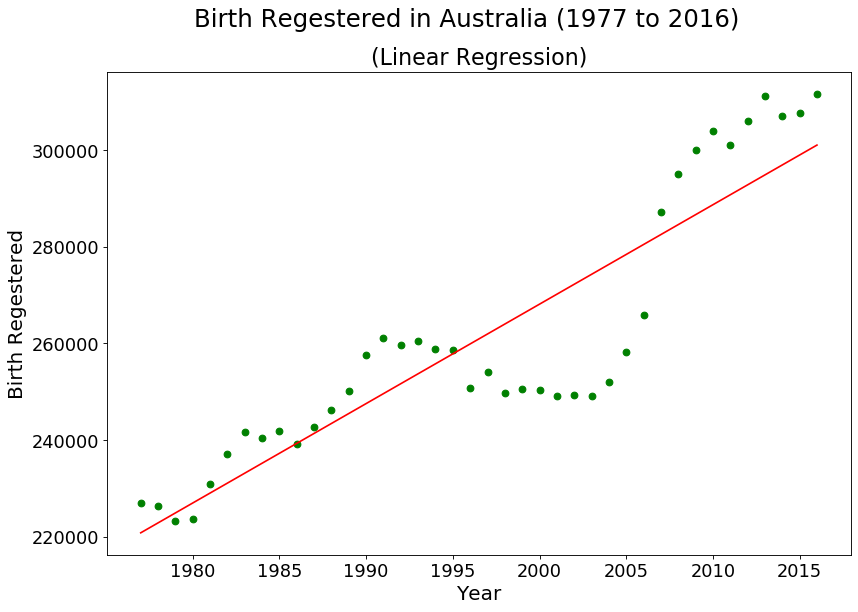

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 


scaler = StandardScaler()

datas = births
X = datas.iloc[:, 0:1].values 
y = datas.iloc[:, 9].values 
ln = LinearRegression() 
ln.fit(X, y) 


plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, y, color = 'green') 
plt.plot(X, ln.predict(X), color = 'red')  
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Birth Regestered', fontsize = 18)
plt.suptitle('Birth Regestered in Australia (1977 to 2016)', fontsize = 22)
plt.title('(Linear Regression)', fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show() 


## A1.2.c:   Linear fit to predict the total births for year 2050 and 2100

In [146]:
# using linear fit to predict total birth in Ausgtralia

# library to import for prediction,
# from sklearn.linear_model import LinearRegression 

# fitting the equation, where X is 'Year' and y is 'Total Birth' data
# ln = LinearRegression() 
# ln.fit(X, y)

x2050 = int(ln.predict([[2050]]))
x2100 = int(ln.predict([[2100]]))

print('Predicting the Total Birth in Australia(Linear Regression):')
print('\tYear 2050:  ', x2050, 'births')
print('\tYear 2010:  ', x2100, 'births')

Predicting the Total Birth in Australia(Linear Regression):
	Year 2050:   370945 births
	Year 2010:   473754 births


## A1.2.d:   Linear fit to predict the total births for year from 2010 onwards

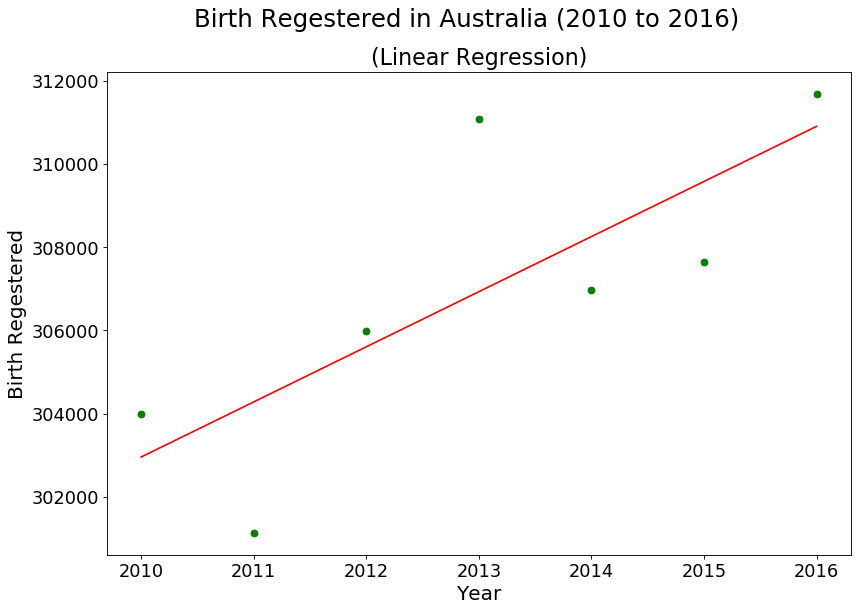

In [149]:
datas2 = births
Xx = datas2.iloc[-7:, 0:1].values 
yy = datas2.iloc[-7:, 9].values 
ln = LinearRegression() 
ln.fit(Xx, yy) 


plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Xx, yy, color = 'green') 
plt.plot(Xx, ln.predict(Xx), color = 'red')  
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Birth Regestered', fontsize = 18)
plt.suptitle('Birth Regestered in Australia (2010 to 2016)', fontsize = 22)
plt.title('(Linear Regression)', fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show() 

## A1.2.e(Challenge):   Polynomial regression

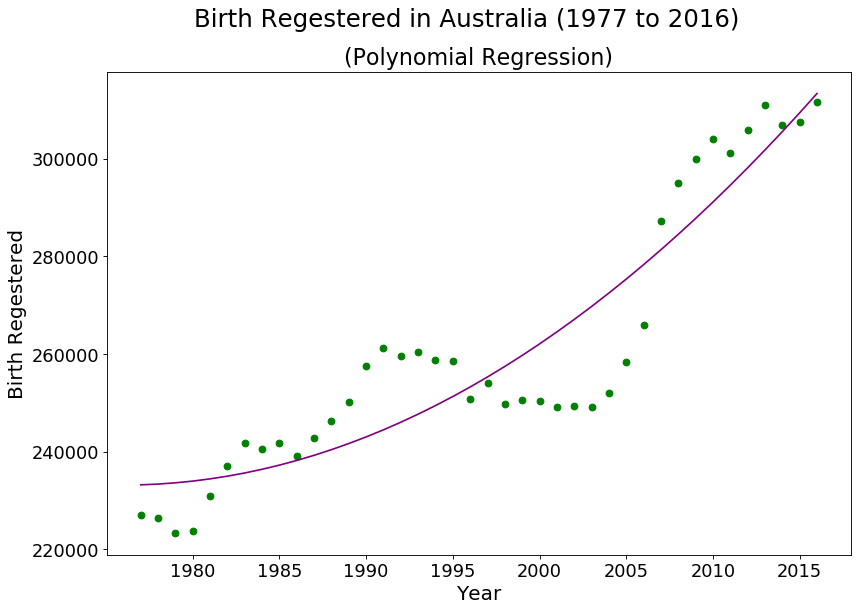

In [151]:
from sklearn.preprocessing import PolynomialFeatures 

pol = PolynomialFeatures(degree = 2) 
X_pol = pol.fit_transform(X) 
pol.fit(X_pol, y) 
ln2 = LinearRegression() 
ln2.fit(X_pol, y)

plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, y, color = 'green') 
plt.plot(X, ln2.predict(pol.fit_transform(X)), color = 'purple')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Birth Regestered', fontsize = 18)
plt.suptitle('Birth Regestered in Australia (1977 to 2016)', fontsize = 22)
plt.title('(Polynomial Regression)', fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
  
plt.show() 

## A1.2.e.ii:   Linear fit to predict the total births for year 2050 and 2100

In [152]:
# ln2.predict(pol.fit_transform([[2050]]))

# using polynomial regression fit to predict total birth in Ausgtralia

# library to import for prediction,
# from sklearn.linear_model import LinearRegression 

# fitting the equation, where X is 'Year' and y is 'Total Birth' data
# pol = PolynomialFeatures(degree = 2) 
# X_pol = pol.fit_transform(X) 
# pol.fit(X_pol, y) 
# ln2 = LinearRegression() 
# ln2.fit(X_pol, y)

x2050 = int(ln2.predict(pol.fit_transform([[2050]])))
x2100 = int(ln2.predict(pol.fit_transform([[2100]])))

print('Predicting the Total Birth in Australia (Polynomial Regression):')
print('\tYear 2050:  ', x2050, 'births')
print('\tYear 2010:  ', x2100, 'births')

Predicting the Total Birth in Australia (Polynomial Regression):
	Year 2050:   507485 births
	Year 2010:   1003052 births


## A1.3:   Inspecting the data for QLD and NT

In [158]:
# a
tfQ = TFR['QLD'].min()
print('Minimum value for TFR recorded for Queensland is: ', tfQ)
TFRLowYearQ = TFR[TFR['QLD'] == tfQ]
QYear = int(TFRLowYearQ['Year'])
NTtfr = float(TFRLowYearQ['NT'])
print('lowest TFR year in the Queensland is: ', QYear)
print('Northern Terretory corresonding TFR when Queensland had least TFR: ', NTtfr)

Minimum value for TFR recorded for Queensland is:  1.8
lowest TFR year in the Queensland is:  1999
Northern Terretory corresonding TFR when Queensland had least TFR:  2.123


## A1.4:   Inspecting the data for QLD and NT

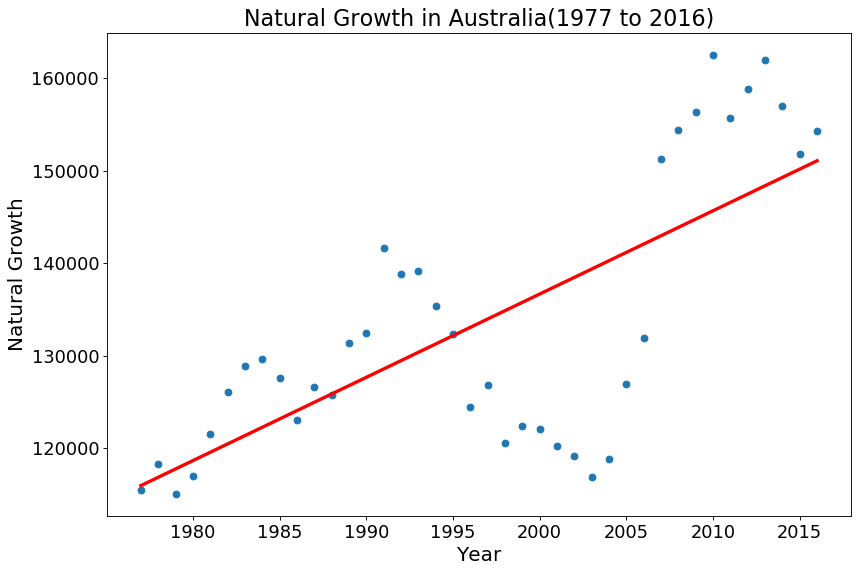

In [15]:
from scipy.stats import linregress

bData = births
dData = deaths
bData['Total_b'] = bData['NSW'] + bData['ACT'] + bData['QLD'] + bData['SA'] + bData['WA'] + bData['TAS'] + bData['VIC'] + bData['NT']
dData['Total_d'] = dData['NSW'] + dData['ACT'] + dData['QLD'] + dData['SA'] + dData['WA'] + dData['TAS'] + dData['VIC'] + dData['NT']

austBirthsDeaths = pd.merge(bData, dData, on='Year')
austBirthsDeaths['natGrowth']  = austBirthsDeaths['Total_b'] - austBirthsDeaths['Total_d']
austBirthsDeaths.head()


plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(austBirthsDeaths['Year'], austBirthsDeaths['natGrowth'])
slope, intercept, r_value, p_value, std_err = linregress(austBirthsDeaths['Year'], austBirthsDeaths['natGrowth'])
line = [slope*xi + intercept for xi in austBirthsDeaths['Year']]
plt.plot(austBirthsDeaths['Year'], line, '-r', linewidth=3)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Natural Growth', fontsize = 18)
plt.title('Natural Growth in Australia(1977 to 2016)', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

# A2. Investigating the Migration Data(NOM and NIM)

## A2.1. a NOM for VIC, TAS, and WA

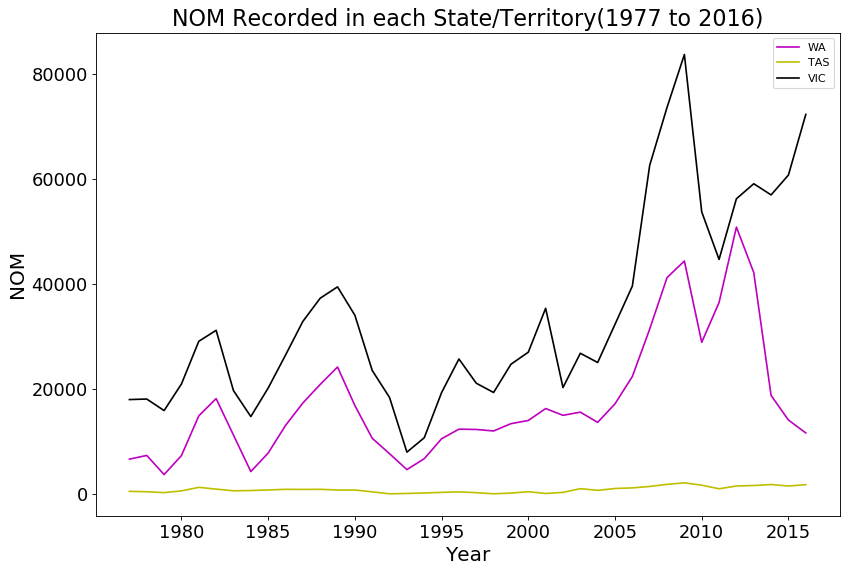

In [160]:



plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
wa = plt.plot(NOM.Year, NOM.WA, color='m')
tas = plt.plot(NOM.Year, NOM.TAS, color='y')
vic = plt.plot(NOM.Year, NOM.VIC, color='k')
plt.ylabel('NOM')
plt.legend((wa[0], tas[0], vic[0]), ('WA', 'TAS', 'VIC'))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('NOM', fontsize = 18)
plt.title('NOM Recorded in each State/Territory(1977 to 2016)', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()



## A2.1. b NOM for Australia over time

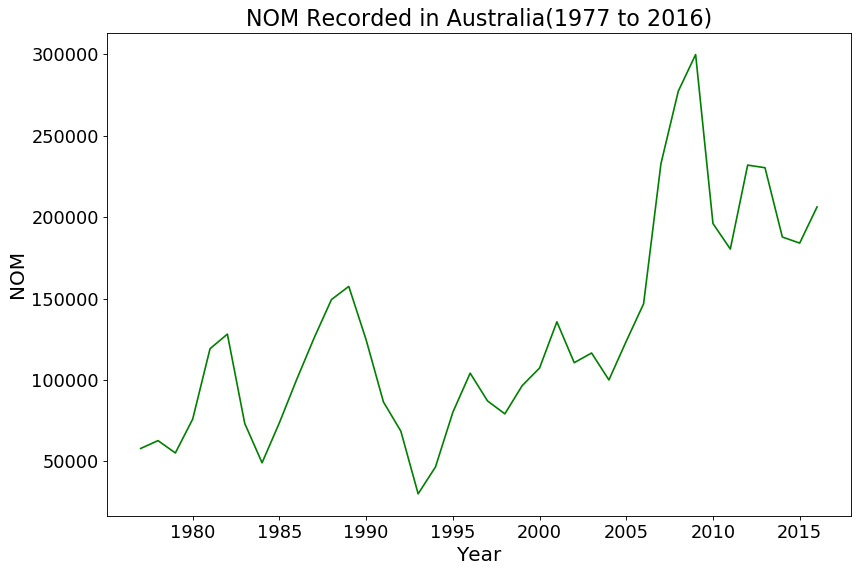

In [17]:
NOM_ = NOM
NOM_['Total'] = NOM_['NSW'] + NOM_['ACT'] + NOM_['QLD'] + NOM_['SA'] + NOM_['WA'] + NOM_['TAS'] + NOM_['VIC'] + NOM_['NT']

plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
total = plt.plot(NOM_.Year, NOM_.Total, color='g')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('NOM', fontsize = 18)
plt.title('NOM Recorded in Australia(1977 to 2016)', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

## A2.2.a      Australia NOM and NIM

In [161]:
aust_NOM_NIM_temp = pd.merge(NOM, NIM, on='Year', suffixes=('_NOM', '_NIM'))
aust_NOM_NIM = aust_NOM_NIM_temp.iloc[np.r_[0:1, -1:0]]
aust_NOM_NIM

,Year,NSW_NOM,VIC_NOM,QLD_NOM,SA_NOM,WA_NOM,TAS_NOM,NT_NOM,ACT_NOM,NSW_NIM,VIC_NIM,QLD_NIM,SA_NIM,WA_NIM,TAS_NIM,NT_NIM,ACT_NIM
0,1977,25236,17969,4012,2874,6631,506,408,261,-9000,-10000,11000,0,5000,-1000,2000,2000
39,2016,80007,72215,24952,11283,11621,1771,1048,3330,-11539,17639,11986,-7212,-10010,760,-2029,383


## A2.2.a      Australia NOM and NIM relationship

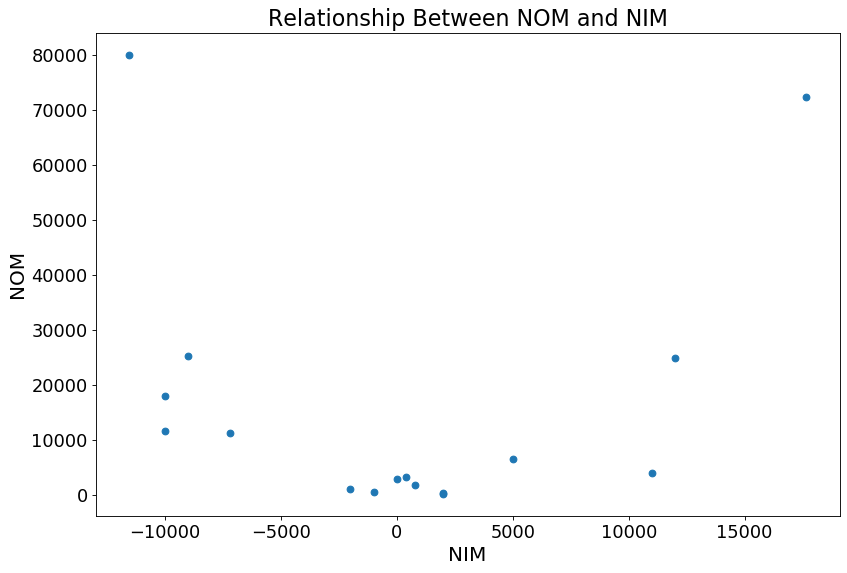

In [28]:
# 2. b.
# preparing data
NIM_1977 = aust_NOM_NIM.iloc[0, 10:19]
NIM_2016 = aust_NOM_NIM.iloc[1, 10:19]
NOM_1977 = aust_NOM_NIM.iloc[0, 1:9]
NOM_2016 = aust_NOM_NIM.iloc[1, 1:9]
NIM_x = NIM_1977.append(NIM_2016)
NOM_y = NOM_1977.append(NOM_2016)


plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(NIM_x, NOM_y)
plt.xlabel('NIM', fontsize = 18)
plt.ylabel('NOM', fontsize = 18)
plt.title('Relationship Between NOM and NIM', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

## A2.2.c      Victoria NOM and NIM

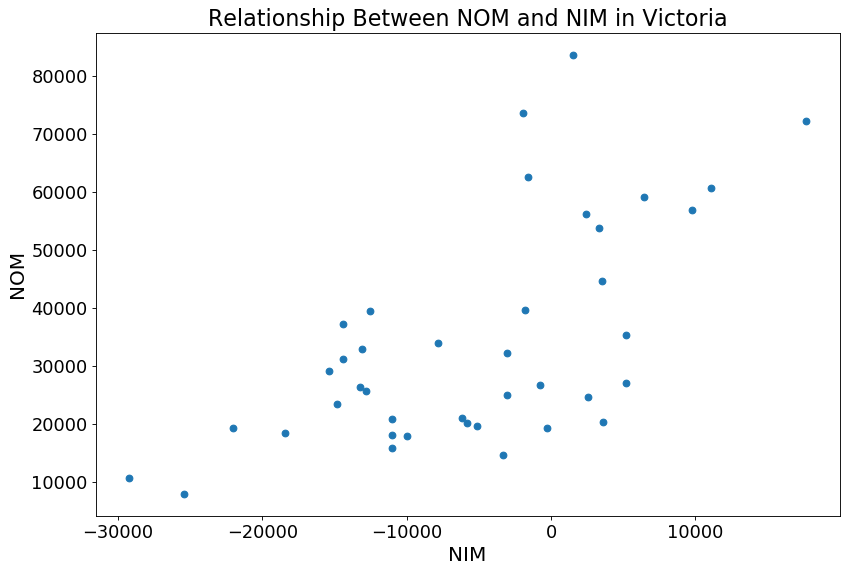

In [162]:
aust_NOM_NIM_temp
vic_NOM_NIM = aust_NOM_NIM_temp[['VIC_NOM', 'VIC_NIM']]

plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(vic_NOM_NIM['VIC_NIM'], vic_NOM_NIM['VIC_NOM'])
plt.xlabel('NIM', fontsize = 18)
plt.ylabel('NOM', fontsize = 18)
plt.title('Relationship Between NOM and NIM in Victoria', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

## A2.2.a    NOM and NIM for QLD and NSW

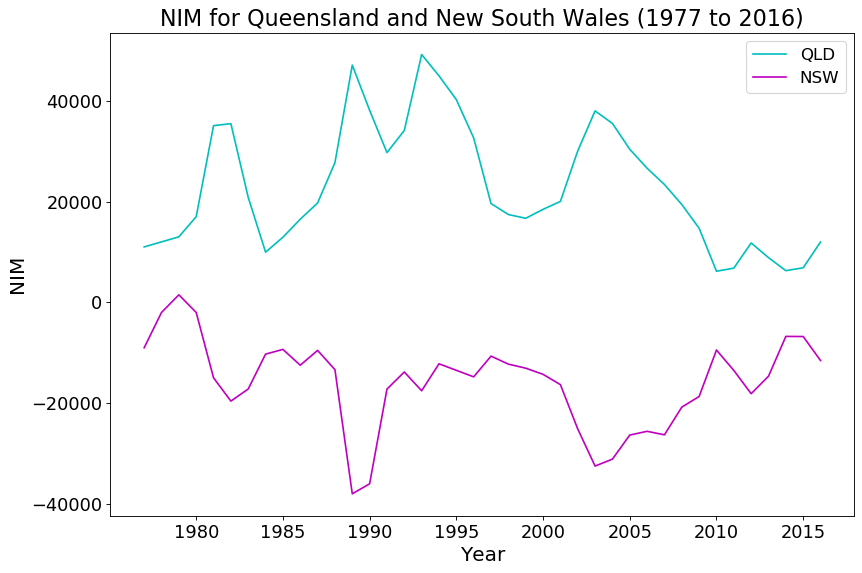

In [42]:
# d.

plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
qld = plt.plot(NIM.Year, NIM.QLD, color='c')
nsw = plt.plot(NIM.Year, NIM.NSW, color='m')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('NIM', fontsize = 18)
plt.title('NIM for Queensland and New South Wales (1977 to 2016)', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend((qld[0], nsw[0]), ('QLD', 'NSW'), fontsize = 15)
plt.show()

# A3.     Visualising the relationthip over time

In [163]:
from functools import reduce

births = pd.read_csv('Births.csv', sep=',')
deaths = pd.read_csv('Deaths.csv', sep=',')
TFR = pd.read_csv('TFR.csv', sep=',')
NOM = pd.read_csv('NOM.csv', sep=',')
NIM = pd.read_csv('NIM.csv', sep=',')

births_melted = pd.melt(births, id_vars=['Year'], var_name = 'States/Territories', value_name='Births')
deaths_melted = pd.melt(deaths, id_vars=['Year'], var_name = 'States/Territories', value_name='Deaths')
TFR_melted = pd.melt(TFR, id_vars=['Year'], var_name = 'States/Territories', value_name='TFR')
NOM_melted = pd.melt(NOM, id_vars=['Year'], var_name = 'States/Territories', value_name='NOM')
NIM_melted = pd.melt(NIM, id_vars=['Year'], var_name = 'States/Territories', value_name='NIM')

stat_dfs = [births_melted, deaths_melted, TFR_melted, NOM_melted, NIM_melted]
stat_final = reduce(lambda x,y: pd.merge(x,y,on=['Year','States/Territories'],how='left'), stat_dfs)
stat_final['Total Population Growth'] = stat_final['Births'] + stat_final['NOM'] + stat_final['NIM'] - stat_final['Deaths']


In [164]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

## 1. and (2.a and 2.c)

In [165]:
from motionchart.motionchart import MotionChart


mChart = MotionChart(df = stat_final)
mChart.to_notebook()

## 2.b NOM for Victoria and NSW over time

In [100]:
stat_final_N = stat_final[(stat_final['States/Territories']) == 'NSW']
stat_final_V = stat_final[(stat_final['States/Territories']) == 'VIC']
stat = stat_final_N.append(stat_final_V, ignore_index=False, verify_integrity=False, sort=None)



In [99]:
mChart = MotionChart(df = stat)
mChart.to_notebook()

# Task B: Exploratory Analysis of Data

In [102]:
crime = pd.read_csv('Crime_Statistics_SA_2014_2019.csv', sep=',')

## B1. Daily Number of Crimes

### 1. Number of days atleast 15 crimes occured that day for each suburb.

In [105]:
func = {'Offence Count': {'WillDroped' : lambda x: sum(e for e in x)}}
crime_ = crime.groupby(['Reported Date', 'Suburb - Incident']).agg(func).reset_index()
crime_.columns = crime_.columns.droplevel(1)#each date, for each suburb crimes count.
crime_.rename(columns = {'Offence Count':'Count'},inplace = True) 

def func2(list): #function to count each time crime is more then 15
    count = 0
    for e in list:
        if e >= 15:
            count += 1
    return count

# organizing the dataframe for display
func1 = {'Count' : {'Number of days at least 15 crimes happend' : func2}}
crime_ = crime_.groupby(['Suburb - Incident']).agg(func1)
crime_.columns = crime_.columns.droplevel(0)
crime_ = crime_.reset_index()

# display
crime_

,Suburb - Incident,Number of days at least 15 crimes happend
0,ABERFOYLE PARK,0.0
1,ADDRESS UNKNOWN,0.0
2,ADELAIDE,877.0
3,ADELAIDE AIRPORT,0.0
4,AGERY,0.0
5,ALAWOONA,0.0
6,ALBANY,0.0
7,ALBERT PARK,0.0
8,ALBERTON,0.0
9,ALDGATE,0.0


### 2. Atleast one day when daily number of crimes are more then 15



In [106]:
func = {'Offence Count': {'WillDroped' : lambda x: sum(e for e in x)}}

crime1 = crime.groupby(['Reported Date', 'Suburb - Incident']).agg(func).reset_index()
crime1.columns = crime1.columns.droplevel(1)#each date, for each suburb crimes count.
crime1 = crime1[crime1['Offence Count'] >= 15]

#function to count each crime atleast 15 days count number.
def func2(list): 
    count = 0
    for e in list:
        count += 1
    return count
    
# function to apply func2 in Offence count column
func3 = {'Offence Count' : {'Atleast 15 crimes per day count' : func2}}

crime1 = crime1.groupby(['Suburb - Incident']).agg(func3).reset_index()

# organizing the dataframe
crime1.columns = crime1.columns.droplevel(0)
crime1.rename(columns = {'':'Suburb - Incident'},inplace = True) 


crime1

,Suburb - Incident,Atleast 15 crimes per day count
0,ADELAIDE,877.0
1,ASCOT PARK,1.0
2,DAVOREN PARK,1.0
3,FINDON,1.0
4,GLENELG,1.0
5,LOXTON,1.0
6,MARLESTON,1.0
7,MODBURY,1.0
8,MORPHETT VALE,3.0
9,MOUNT BARKER,1.0


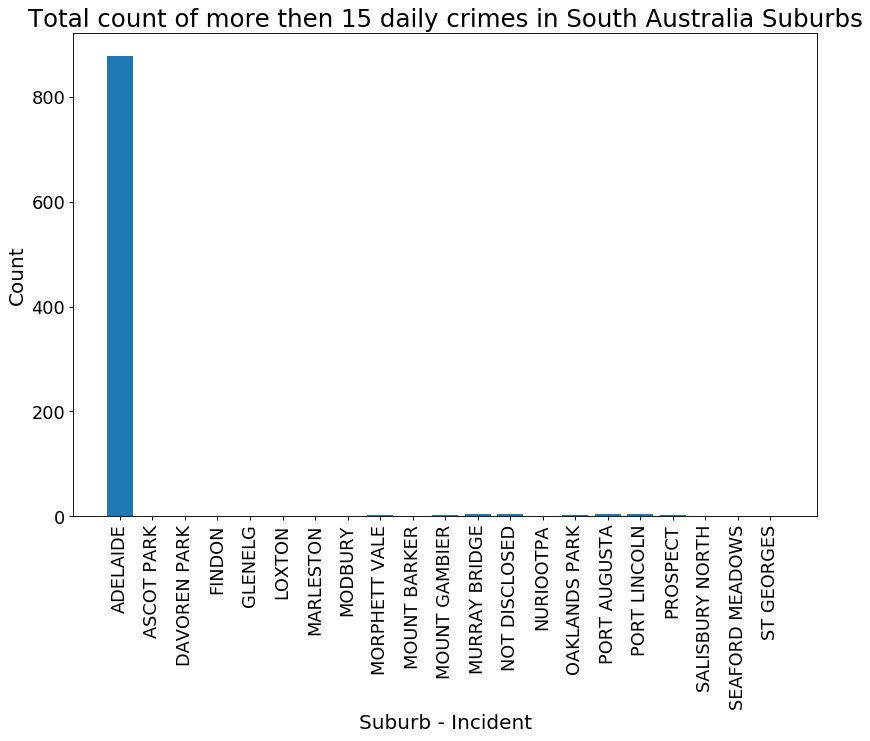

In [108]:
# plot


index = np.arange(len(crime1['Atleast 15 crimes per day count']))

plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
  
plt.bar(crime1['Suburb - Incident'], crime1['Atleast 15 crimes per day count'])
plt.xticks(index, crime1['Suburb - Incident'], rotation='vertical')
plt.xlabel('Suburb - Incident', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Total count of more then 15 daily crimes in South Australia Suburbs', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

### 3. Appropriate graph to detect outliers, and plotting outlier removed dataframe into bar graph

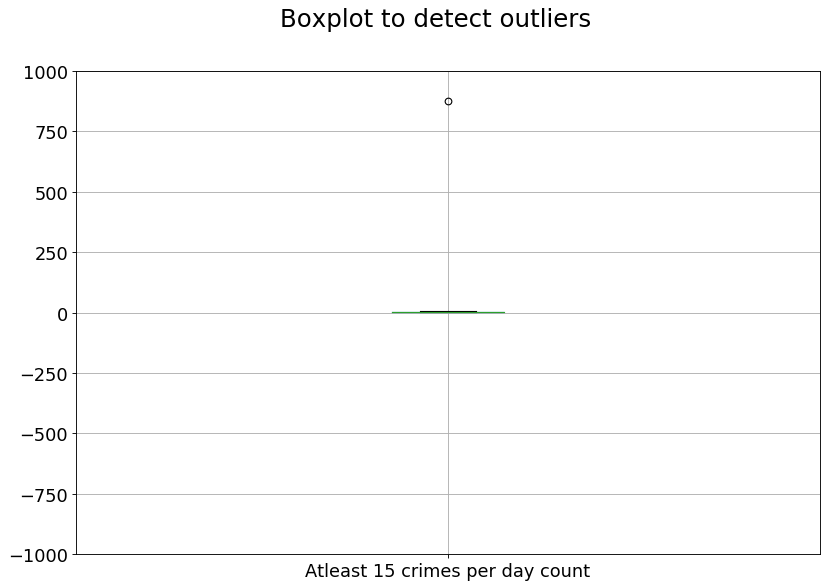

In [126]:
# boxplot to remove outliers

plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')


crime1.boxplot(column = 'Atleast 15 crimes per day count')
plt.suptitle('Boxplot to detect outliers', fontsize = 22)
plt.ylim(-1000, 1000) # setting limit on y-axis
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

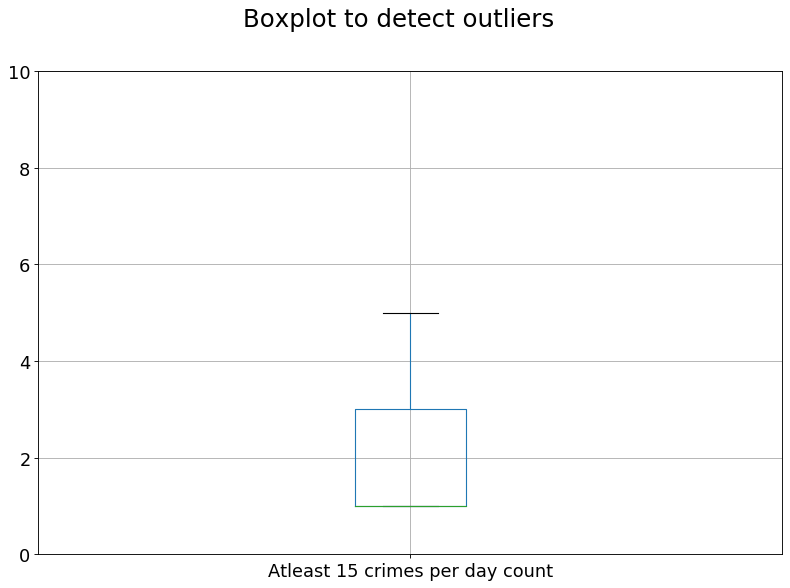

In [128]:
plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
crime1.boxplot(column = 'Atleast 15 crimes per day count')
plt.suptitle('Boxplot to detect outliers', fontsize = 22)
plt.ylim(0, 10) # setting limit on y-axis
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

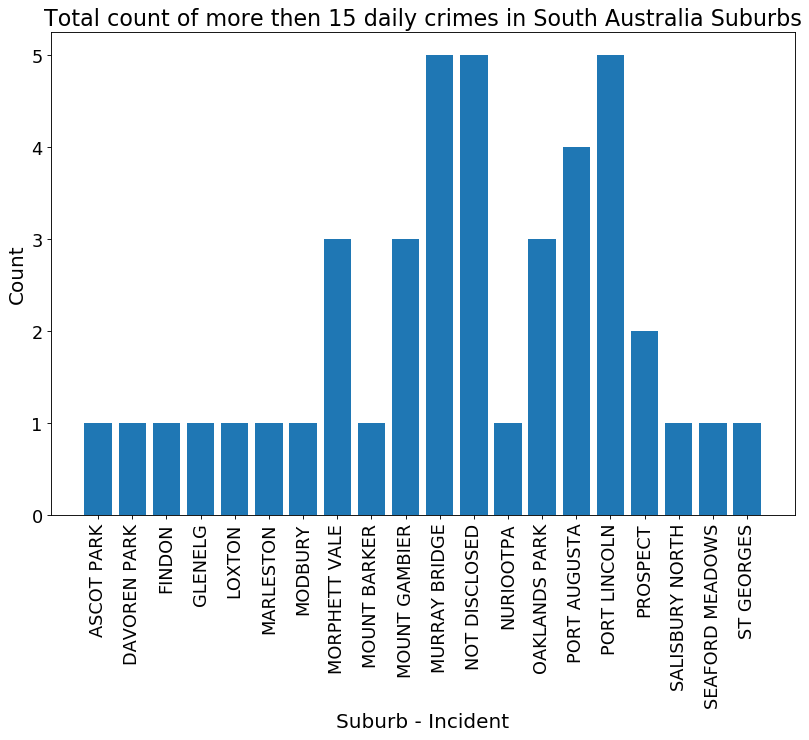

In [132]:
# Bar graph with outlier removed dataframe.
crime2 = crime1[crime1['Suburb - Incident'] != 'ADELAIDE']

index = np.arange(len(crime2['Atleast 15 crimes per day count']))
    
plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(crime2['Suburb - Incident'], crime2['Atleast 15 crimes per day count'])
plt.xticks(index, crime2['Suburb - Incident'], rotation='vertical')
plt.xlabel('Suburb - Incident', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Total count of more then 15 daily crimes in South Australia Suburbs', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

### 4. Comparing the graphs

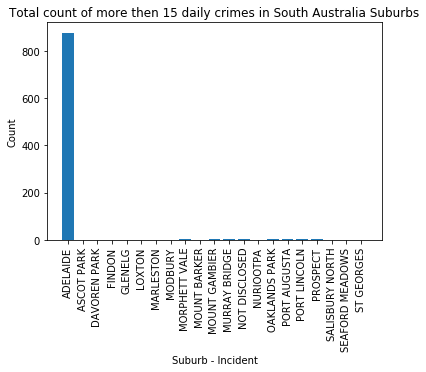

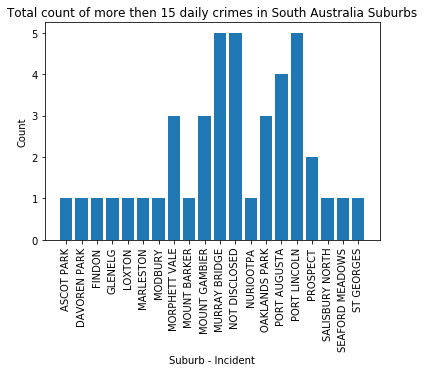

In [133]:
index = np.arange(len(crime1['Atleast 15 crimes per day count']))
    
    
plt.bar(crime1['Suburb - Incident'], crime1['Atleast 15 crimes per day count'])
plt.xlabel('Suburb - Incident')
plt.ylabel('Count')
plt.title('Total count of more then 15 daily crimes in South Australia Suburbs')
plt.xticks(index, crime1['Suburb - Incident'], rotation='vertical')
plt.show()


index = np.arange(len(crime2['Atleast 15 crimes per day count']))
    
    
plt.bar(crime2['Suburb - Incident'], crime2['Atleast 15 crimes per day count'])
plt.xlabel('Suburb - Incident')
plt.ylabel('Count')
plt.title('Total count of more then 15 daily crimes in South Australia Suburbs')
plt.xticks(index, crime2['Suburb - Incident'], rotation='vertical')
plt.show()